## Как показать свой продвинутый уровень в matplotlib
...*или подать заявку на конференцию спустя 4 дня слез с невекторными шрифтами при компиляции статьи в pdf, но это другая история.* 

 LaTeX и дополнительные шрифты на графике помогают если:

*   Вам необходимо сохранить графики в высоком разрешении, не потеряв красоту подписей
*   Вы конвертируете tex файл с изображениями, построенными с matplotlib
*  Вам в сотый раз вываливается ошибка о невекторных шрифтах в документе, пока вы подаетесь на конференцию — мой вариант. 

В ноутбуке:

- дополнительные шрифты для подписей графиков
- отличие векторных и не векторных шрифтов
- исследование возможных ошибок, при работе в комбинации TeX+matplolib
- про формат eps для изображений в высоком разрешении
- код



In [ ]:
import pandas as pd
from math import factorial
import matplotlib.pyplot as plt

#Чтобы создать тестовую директорию
import os

In [ ]:
!mkdir test_plots

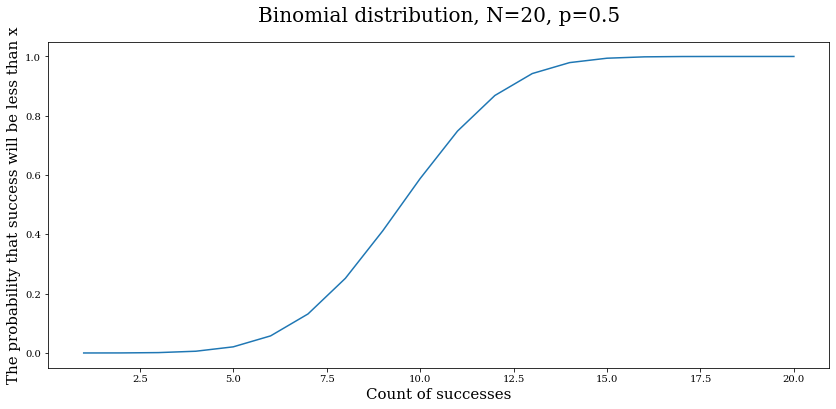

In [59]:
#Для начала посмотрим на график без каких-либо дополнительный историй

N = 20

p = 0.5
q = 1 - p

fig, ax = plt.subplots(figsize=(14, 6))

x = [i for i in range(1, 21)]

probability_function = [factorial(N)/((factorial(N-i)*(factorial(i))))*(p**i)*(q**(N-i)) for i in x]

distr_funstion = [sum(probability_function[:i]) for i in x]

ax.plot(x, distr_funstion, figure=fig)

plt.title(f'Binomial distribution, N={N}, p={p}', pad=20, fontsize=20)
plt.xlabel('Count of successes', fontsize=15)
plt.ylabel('The probability that success will be less than x',  fontsize=15)

plt.show()
fig.savefig('test_plots/standart_plot.png', format='png',  facecolor="white")

В целом — изображение выглядит стандартно и неплохо. Однако если вы сейчас откроете сохраненный файл png, то, приблизив картинку, увидите следующее: 

<img src='https://drive.google.com/uc?id=1-3bCkcCcn9kPXdLBXcLl0KzSV3hrxNII'>

(если изображение не открывается — гляньте с другого бразуера).

Чтобы навести красоту, понадобится подтянуть себе кучку всего дополнительного. Но красота стоит жертв (нет), поэтому последовательно выполнив 3 ячейки ниже, **перезапустите среду выполнения** и продолжайте чтение. 

In [ ]:
#Наведем красоту

!sudo apt install texlive texlive-latex-extra texlive-fonts-recommended texlive-latex-recommended dvipng -q

Reading package lists... Done
Building dependency tree       
Reading state information... Done
dvipng is already the newest version (1.15-1.1).
texlive is already the newest version (2019.20200218-1).
texlive-fonts-recommended is already the newest version (2019.20200218-1).
texlive-latex-extra is already the newest version (2019.202000218-1).
texlive-latex-recommended is already the newest version (2019.20200218-1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [ ]:
!pip install latex -q

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [ ]:
!sudo apt install cm-super -q

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  cm-super-minimal pfb2t1c2pfb
The following NEW packages will be installed:
  cm-super cm-super-minimal pfb2t1c2pfb
0 upgraded, 3 newly installed, 0 to remove and 23 not upgraded.
Need to get 24.5 MB of archives.
After this operation, 59.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 cm-super-minimal all 0.3.4-15 [5,811 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 pfb2t1c2pfb amd64 0.3-11 [9,342 B]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 cm-super all 0.3.4-15 [18.7 MB]
Fetched 24.5 MB in 1s (16.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readline
de

**Перезапустите среду выполнения**

Итак.Решением проблемы масштабирования шрифта на высокие разрешения является использование векторных шрифтов. 

*Векторные шрифты* изначально предполагалист для печати высокого качества на перьевых или струйных принтеров. Их мы скачали в библиотеке cm-super. Чтобы подтянуть их, неоьходимо воспользоваться настройками matplolib. Чтобы обеспечить векторность шрифтов будем сохранять изображение в формате `eps`

Eps (Encapsulated PostScript. Первоначально формат EPS (Encapsulated PostScript). Первоначально разработан под печать принтеров и следовательно при увеличении изображения не ухудшится качествоо и не будет “битых” пикселей.

И в ячейке ниже бонусом несколько параметров:

*   `tex.usetex` — если вы планируете конвертировать изображение вместе с Латехом и использовать латех-формат подписей. Он выглядит сильно аккуратнее, пример [тут](https://stackoverflow.com/questions/21345922/whats-the-benefit-of-text-usetex-true-in-matplotlib)
*   `pgf.rcfonts` — хотите ли вы использовтаь стандартные шрифты matplotliba
* `font.family` — дополнительное форматирование шрифтов
* `pgf.texsystem` — зависит от ттого каким образом вы планируете собирать Латех



In [53]:
plt.rcParams.update({
    "text.usetex": False, #если хотите конвертировать изображение в латех-тексте
    "pgf.rcfonts": False, #не использовать стандартные шрифты матплотлиба
    "font.family": "serif", #serif (c засечками), sans-serif (без засечек), cursive (курсив), fantasy (что-то на фантастическом), monospace (моноширинные)
    "pgf.texsystem": 'pdflatex', # default is xelatex, lualatex
})

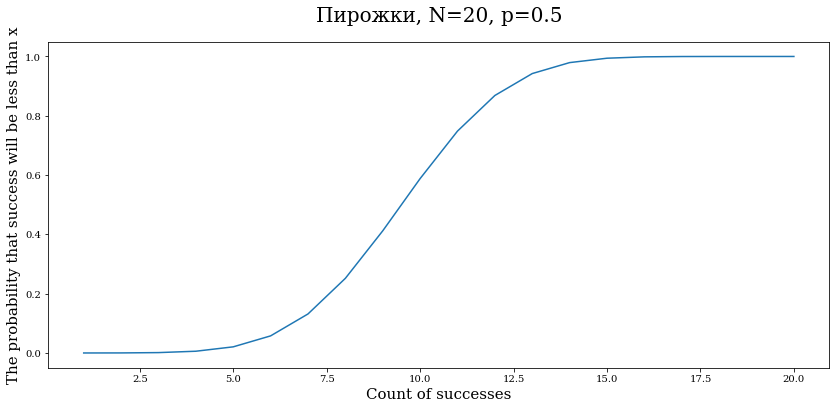

In [57]:
#Сохраним наш график в новом формате

N = 20

p = 0.5
q = 1 - p

fig, ax = plt.subplots(figsize=(14, 6))

x = [i for i in range(1, 21)]

probability_function = [factorial(N)/((factorial(N-i)*(factorial(i))))*(p**i)*(q**(N-i)) for i in x]

distr_funstion = [sum(probability_function[:i]) for i in x]

ax.plot(x, distr_funstion, figure=fig)

plt.title(f'Binomial distribution, N={N}, p={p}', pad=20, fontsize=20)
plt.xlabel('Count of successes', fontsize=15)
plt.ylabel('The probability that success will be less than x',  fontsize=15)

plt.show()
fig.savefig('test_plots/plot_with_fonts.eps', format='eps',  facecolor="white", edgecolor="none")

Примечание. Для русского текста использовать Латех вы возможно не сможете. По крайней мере мне удалось найти только [это](http://s.arboreus.com/2009/04/cyrillic-letters-in-matplotlibpylab.html) решение, и оно  не является рабочим с версии matplotlib 3.0.0. 

Раньше возможность использовать юникод давалась как 'rc('text.latex',unicode=True)' в [документации](https://) написано, что unicode по умолчанию с версии 3.0.0. 

Без теха делать подписи на русском и сохранять себе качество можно спокойно, пример:


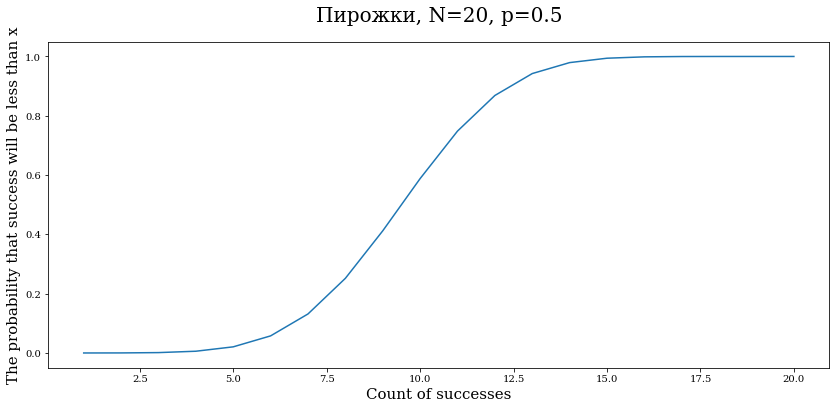

In [58]:
#Все еще тот график
N = 20

p = 0.5
q = 1 - p

fig, ax = plt.subplots(figsize=(14, 6))

x = [i for i in range(1, 21)]

probability_function = [factorial(N)/((factorial(N-i)*(factorial(i))))*(p**i)*(q**(N-i)) for i in x]

distr_funstion = [sum(probability_function[:i]) for i in x]

ax.plot(x, distr_funstion, figure=fig)

plt.title(f'Пирожки, N={N}, p={p}', pad=20, fontsize=20)
plt.xlabel('Count of successes', fontsize=15)
plt.ylabel('The probability that success will be less than x',  fontsize=15)

plt.show()
fig.savefig('test_plots/plot_with_fonts.eps', format='eps',  facecolor="white", edgecolor="none")